## クラウド設定

一度だけ実行すれば良い.

In [1]:
from pathlib import Path

config = """[default]
url=https://api.qiqb-cloud.jp
api_token=_FJNOxhEzT9eAyoP0wFG
"""
Path("~/.oqtopus").expanduser().write_text(config)
print("Configuration saved.")

Configuration saved.


QIQBクラウドのリンク：https://www.qiqb-cloud.jp/  
  
「ジョブ」のタブで, 実行済み・実行中のジョブを確認することができる. 

## ジョブの実行

以下の`PROGRAM = `に実行したい.pyファイル名を記入する.  
実行がなかなか終わらない場合はカーネル再起動が必要かもしれない.  
`payloads`に測定結果が返ってくる.  

In [2]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from src.adapter import QuriAdapter, collect_payloads_from_job
from src.plotters import plot_payload

In [ ]:
# ジョブの実行

DEVICE = "anemone"
PROGRAM = "check_waveform" # 読み出しパルスの反射波形を確認するプログラム

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{DEVICE}/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

print("sample:", payloads[:3], f"... len={len(payloads)}")


job_id = 068e7810-eb7d-7a30-8000-8beba02bd558
job_status = succeeded  elapsed=14.747
sample: [{'mode': 'avg', 'data': {'Q08': {'raw': {'I': [-0.0004955451004207134, -0.00033012882340699434, 0.0007038430194370449, 0.0008928736206144094, 0.000578295614104718, 0.00019230542238801718, -0.0012424271553754807, -0.0005198420258238912, -0.0005222995532676578, 0.00021486377227120101, 0.00012099034211132675, -0.0010129647562280297, -0.00018570151587482542, -0.00047096580965444446, -0.0005875857314094901, -0.0007778725703246891, -0.0014995195670053363, 0.000768560275901109, 0.0044431607238948345, 0.003870211308822036, -0.005540596786886454, -0.021983522921800613, -0.03583333268761635, -0.0433708056807518, -0.045430105179548264, -0.04673093929886818, -0.04767025634646416, -0.0462736114859581, -0.04343963786959648, -0.040947772562503815, -0.038830555975437164, -0.03675562143325806, -0.03505354002118111, -0.03393195942044258, -0.03213731199502945, -0.03127409517765045, -0.03009919822216034, -0.02856

In [5]:
# 測定結果
payloads

[{'mode': 'avg',
  'data': {'Q08': {'raw': {'I': [0.0006156019517220557,
      -0.00020501809194684029,
      -0.0007578068180009723,
      -2.195981096519972e-06,
      0.0013654421782121062,
      -0.0002383265527896583,
      -0.0006663689855486155,
      -0.0005447633448056877,
      -0.001013432047329843,
      -0.0008477664086967707,
      0.0009210986900143325,
      0.0006919885636307299,
      0.00035700900480151176,
      -0.0011204304173588753,
      -0.0012015905231237411,
      0.00014921235560905188,
      2.631499955896288e-05,
      0.0017543826252222061,
      0.0035267462953925133,
      0.0030353134498000145,
      -0.0055868858471512794,
      -0.020707717165350914,
      -0.035425975918769836,
      -0.04250222444534302,
      -0.0458601750433445,
      -0.04774600639939308,
      -0.04837809503078461,
      -0.04662635922431946,
      -0.04336711764335632,
      -0.04096296802163124,
      -0.03866476193070412,
      -0.036563411355018616,
      -0.035234358161687

測定結果のグラフ表示は, `plot_payload`関数を用いるか, `payloads`から値を直接取り出してプロットする.  

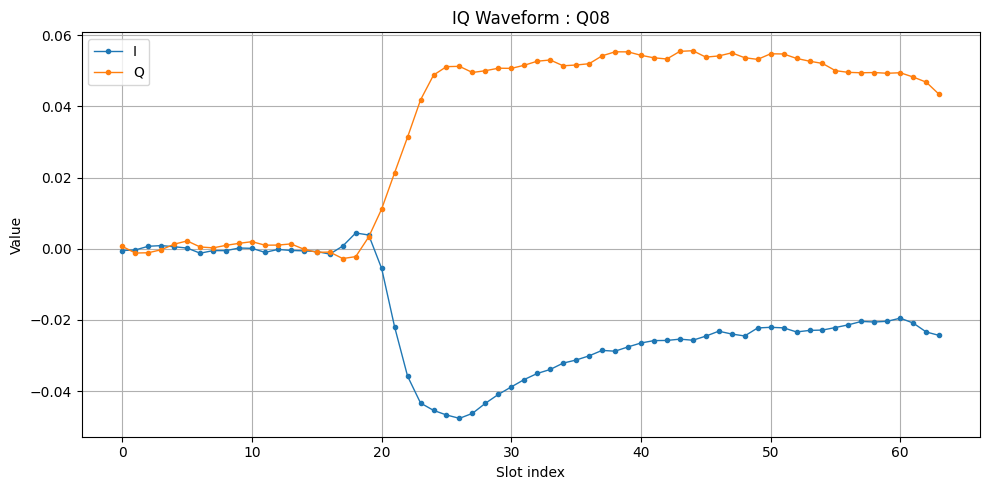

In [ ]:
# グラフ描画

p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)

job_id = 068e77cf-d2ac-7c81-8000-73e94d2a6c77
job_status = succeeded  elapsed=26.624


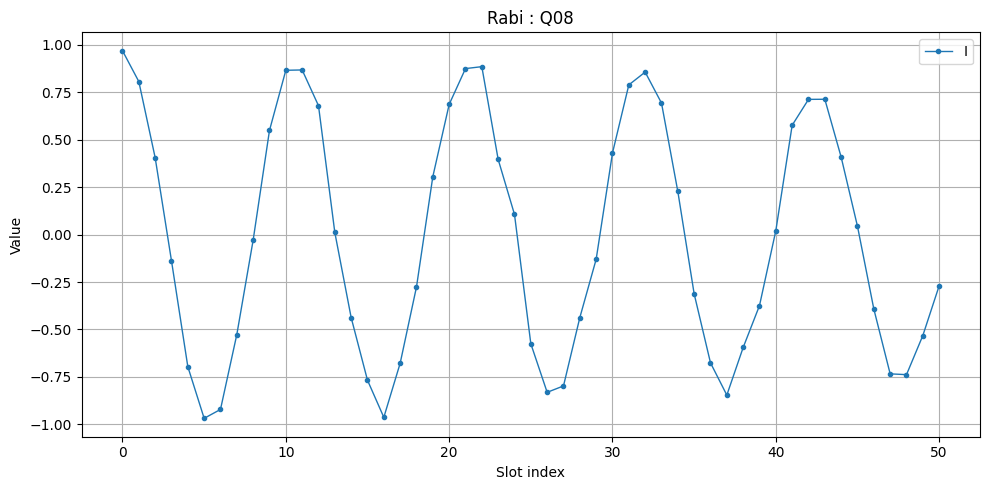

In [ ]:
# ラビ振動測定

DEVICE = "anemone"
PROGRAM = "check_rabi"

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{DEVICE}/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

# グラフ描画
p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)


job_id = 068e781b-2e8c-7f85-8000-c5708d875d8b
job_status = succeeded  elapsed=49.219


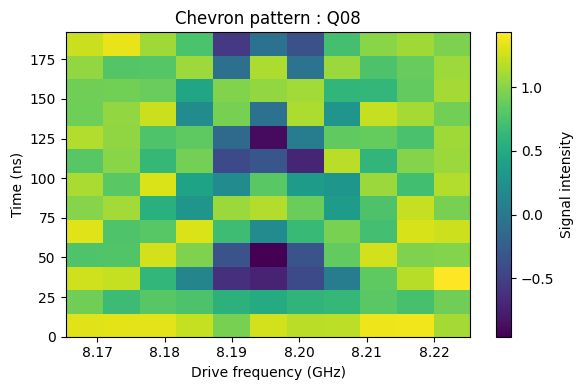

In [3]:
# シェブロンパターン測定

DEVICE = "anemone"
PROGRAM = "chevron_pattern"

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{DEVICE}/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

# グラフ描画
p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)
